# Pandas

https://pandas.pydata.org/docs/user_guide/index.html

In [2]:
import numpy as np
import pandas as pd

## 数据的创建

In [3]:
df = pd.DataFrame({"id":[1001,1002,1003,1004,1005,1006], 
 "date":pd.date_range('20130102', periods=6),
  "city":['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
 "age":[23,44,54,32,34,32],
 "category":['100-A','100-B','110-A','110-C','210-A','130-F'],
  "price":[1200,np.nan,2133,5433,np.nan,4432]},
  columns =['id','date','city','category','age','price'])

df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,SH,100-B,44,NaN
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


## 数据纵向截取

In [5]:
df['id']

0    1001
1    1002
2    1003
3    1004
4    1005
5    1006
Name: id, dtype: int64

## 数据横线截取

In [6]:
df.values 

array([[1001, Timestamp('2013-01-02 00:00:00'), 'Beijing ', '100-A', 23,
        1200.0],
       [1002, Timestamp('2013-01-03 00:00:00'), 'SH', '100-B', 44, nan],
       [1003, Timestamp('2013-01-04 00:00:00'), ' guangzhou ', '110-A',
        54, 2133.0],
       [1004, Timestamp('2013-01-05 00:00:00'), 'Shenzhen', '110-C', 32,
        5433.0],
       [1005, Timestamp('2013-01-06 00:00:00'), 'shanghai', '210-A', 34,
        nan],
       [1006, Timestamp('2013-01-07 00:00:00'), 'BEIJING ', '130-F', 32,
        4432.0]], dtype=object)

## 数据的拼接
how: One of ‘left’, ‘right’, ‘outer’, ‘inner’. 默认inner。inner是取交集，outer取并集。比如left：[‘A’,‘B’,‘C’];right[’'A,‘C’,‘D’]；inner取交集的话，left中出现的A会和right中出现的买一个A进行匹配拼接，如果没有是B，在right中没有匹配到，则会丢失。'outer’取并集，出现的A会进行一一匹配，没有同时出现的会将缺失的部分添加缺失值。


In [16]:
df1 = pd.DataFrame({"A":[1001,1002,1003,1004,1005,1006], 
                   "B":[1011,1012,1013,1014,1015,1016],
                   "C":[1021,1022,1023,1024,1025,1026]})
df1

df2 = pd.DataFrame({"D":[1051,1052,1053,1054,1055,1056], 
                   "E":[1061,1062,1063,1074,1085,1096],
                   "C":[1021,1022,1023,1024,1025,1026]})

df2

df3 = pd.merge(df1,df2,how = 'inner',on='C')
df3

,A,B,C,D,E
0,1001,1011,1021,1051,1061
1,1002,1012,1022,1052,1062
2,1003,1013,1023,1053,1063
3,1004,1014,1024,1054,1074
4,1005,1015,1025,1055,1085
5,1006,1016,1026,1056,1096


In [25]:
df1 = pd.DataFrame([[1,2,3],[1,10,20],[5,6,7],[3,9,0],[8,0,3]],columns=['x1','x2','x3'])
df2 = pd.DataFrame([[1,2],[1,10],[5,3],[3,6],[8,9]],columns=['x1','x4'])
print (df1)
print (df2)

   x1  x2  x3
0   1   2   3
1   1  10  20
2   5   6   7
3   3   9   0
4   8   0   3
   x1  x4
0   1   2
1   1  10
2   5   3
3   3   6
4   8   9


In [26]:
df3 = pd.merge(df1,df2,how = 'inner',on='x1')
df3

,x1,x2,x3,x4
0,1,2,3,2
1,1,2,3,10
2,1,10,20,2
3,1,10,20,10
4,5,6,7,3
5,3,9,0,6
6,8,0,3,9


# 数据的合并

In [19]:
import pandas as pd
df1=pd.DataFrame([[1,2],[3,4]])
df2=pd.DataFrame([[1,2],[3,4]])
pd.concat([df1,df2])

,0,1
0,1,2
1,3,4
0,1,2
1,3,4


In [23]:
import pandas as pd
filepath =r"/workspace/liyuan3970/study_demo/met_data/"

df1 =  pd.read_csv(filepath+r"1.txt",sep="\s+",header=None)


df2 =  pd.read_csv(filepath+r"2.txt",sep="\s+",header=None)

pd.concat([df1,df2])

,0,1
0,1,2
1,3,4
0,1,2
1,3,4


## 数据的分组聚合

In [27]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
     'key2':['one', 'two', 'one', 'two', 'one'],
     'data1':np.random.randn(5),
     'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.810136,-0.261776
1,a,two,1.418821,1.784775
2,b,one,-0.407386,0.321194
3,b,two,0.842430,0.052241
4,a,one,-0.809479,-1.086368


In [28]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [30]:
grouped.mean()

key1
a    0.473159
b    0.217522
Name: data1, dtype: float64

In [31]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.000328
      two     1.418821
b     one    -0.407386
      two     0.842430
Name: data1, dtype: float64

## Pandas读取数据库

## Pandas绘制自动站数据

0
1


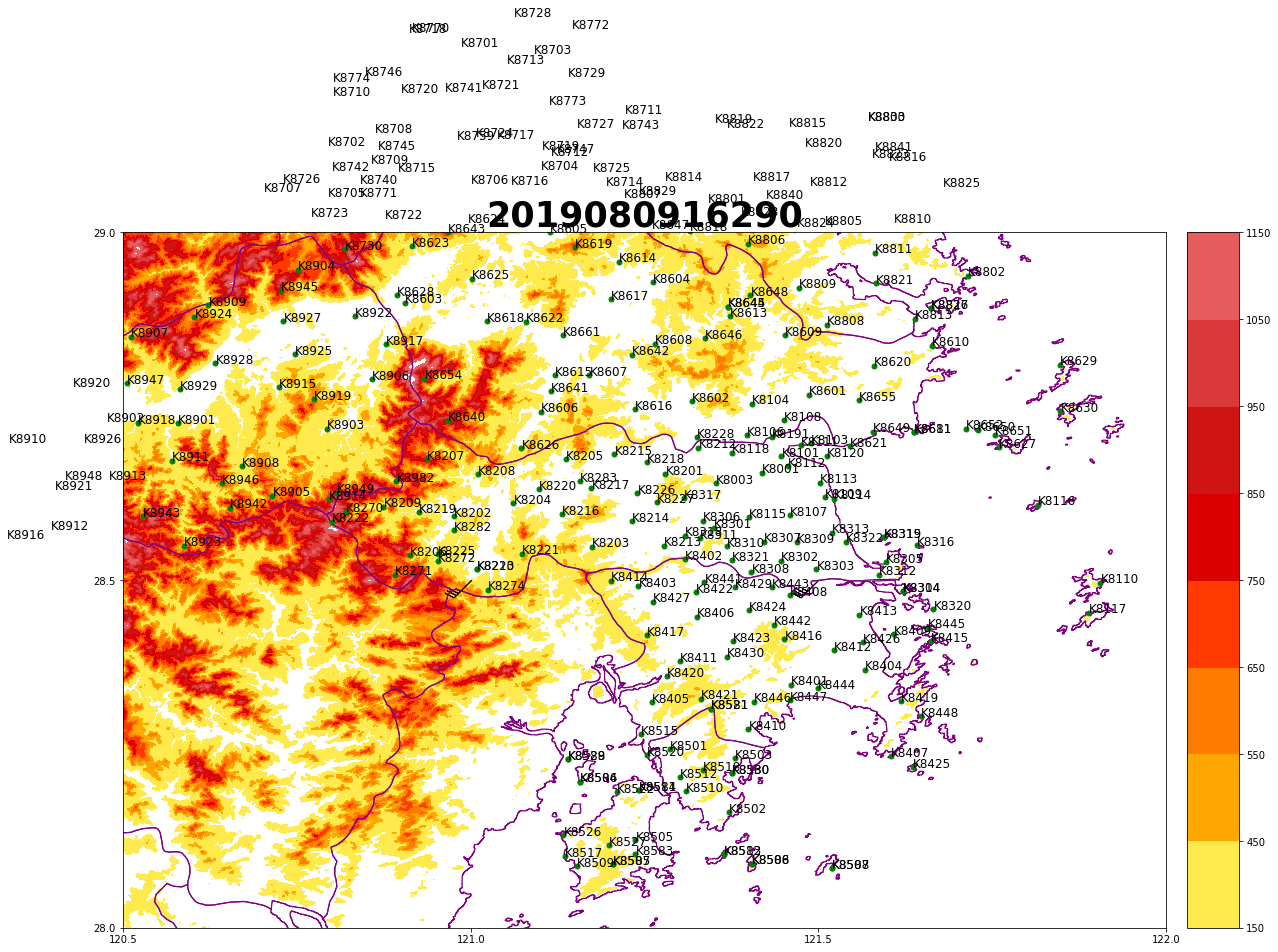

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

In [50]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接


## data
sql_location ="select lat,lon,IIiii from TAB_StationInfo where (IIiii in (select IIiii from  TAB_Mws2019 where \
(IIiii in (select IIiii from TAB_StationInfo where (City = '台州' and Type = '区域站')) and tTime between '2019-08-09 23:00' and '2019-08-10 06:00')))"


df_location = pd.read_sql(sql_location , con=conn)

#df_location




sql_rr = "select b.lat,b.lon,a.IIiii,a.RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii = b.IIiii \
where(tTime between '2019-08-09 23:00' and '2019-08-10 06:00' and (b.City = '台州' and b.Type = '区域站') ) "

df_rr = pd.read_sql(sql_rr , con=conn)


# 分组聚合
grouped = df_rr.groupby(df_rr['IIiii'])
average_rr = grouped.mean()

average_rr


all_rr =pd.merge(df_location,average_rr,on='IIiii')
all_rr


lat_station= list(all_rr.iloc[:,0])
lon_station = list(all_rr.iloc[:,1])
name_station = list(all_rr.iloc[:,2])





# 绘图
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import netCDF4 

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import pandas as pd



self_define_list = [130,144,155,170,185,200,225,235,240,244]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

geo = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/geogphy_file/taiz.nc')
x =geo.variables['lon']
y = geo.variables['lat']
z=  geo.variables['Band1']


f = netCDF4.Dataset('/home/liyuan3970/Data/data/meto_data/radar_typhoon_liqima/wenzhou_rada/out/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc')
name ="Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2.nc"
# u =f.variables['u'][0,0,:,:]
# v = f.variables['v'][0,0,:,:]
ref =  f.variables['ref'][0,1,:,:]
lat = f.variables['lat']
lon = f.variables['lon']




box = [118, 123.5, 26, 30]
scale = '10m'
xstep, ystep = 0.5, 0.5
fig = plt.figure(figsize=(20, 15))

from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=120.5,llcrnrlat=28.0,urcrnrlon=122.0,urcrnrlat=29.0)


fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang.shp'
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'


# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
#ax.quiver(lon[::3],lat[::3],u[::3,::3], v[::3,::3], transform=ccrs.PlateCarree())

#levels = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
levels = [150,450,550,650,750,850,950,1050,1150]


    
# m.barbs(lons,lats,u, v)


lons2, lats2 = np.meshgrid(x[::4], y[::4])
shade = m.contourf(lons2,lats2,z[::4,::4],cmap=cmaps,levels=levels)
#
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)

m.colorbar(shade)

lats = [28.5,28.5]
lons = [121.0,121.5]
u =[25.0,25.0]
v =[25.0,25.0]

for i in range(2):
    print(i)
    m.barbs(lons[i],lats[i],u[i],v[i])


x, y = m(lon_station, lat_station)
plt.plot(x, y, 'ok', markersize=5,color="green")
plt.plot?
i = 0
for a,b in zip(x,y):
    
    plt.text(a,b, name_station[i], fontsize=12)
    i = i+1
    


# x1, y1 = m(121.32, 28.39)
# plt.plot(x1, y1, 'ok', markersize=5)
# plt.text(x1, y1, ' 58664', fontsize=12)

x_val_list=[120.5,121,121.5,122]
#x_text_list=['80E','100E','120E','140E','160E']
plt.xticks(x_val_list)
y_val_list=[28,28.5,29]
# y_text_list=['10S','0','10N','20N','30N','40N','50N']
plt.yticks(y_val_list)
# 添加网格线
#ax.grid()
plt.title(name[15:28],fontsize=35,fontweight='bold') 
# plt.savefig('wind.png')
plt.show()



# 去掉重复值

In [15]:
import pandas as pd
import numpy as np

df=pd.DataFrame(np.arange(16).reshape(4,4),columns=list('ABCD'),index=list('1234'))
df.iloc[1,:] = [0,1,2,3]
print("去掉数据前",df)
df.drop_duplicates(subset=['A', 'B'], keep='last', inplace=True)
print("去掉数据后",df)

去掉数据前     A   B   C   D
1   0   1   2   3
2   0   1   2   3
3   8   9  10  11
4  12  13  14  15
去掉数据后     A   B   C   D
2   0   1   2   3
3   8   9  10  11
4  12  13  14  15


# 缺测值的替换

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"id":[1001,1002,1003,1004,1005,1006], 
 "date":pd.date_range('20130102', periods=6),
  "city":['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
 "age":[23,44,54,32,-9999,32],
 "category":['100-A','100-B','110-A','110-C','210-A','130-F'],
  "price":[1200,np.nan,2133,5433,np.nan,4432]},
  columns =['id','date','city','category','age','price'])

df.replace(23,np.nan)
df['age'].replace(-9999,np.nan,inplace=True)
df['age'].min()

23.0

In [ ]:
# 数据记数

In [16]:
import pandas as pd
import numpy as np
import pandas as pd

base = [3,3,4,3,1,3,3,3,5,2,3,3,3,3]
x_1 = [4,4,4,4,2,1,4,3,4,3,4,4,2,4]
x_2 = [5,3,4,4,2,4,5,1,4,4,1,3,5,1]
x_3 = [5,2,4,1,1,5,4,3,2,3,3,4,2,4]
x_4 = [3,2,3,5,1,3,3,5,4,2,5,5,5,5]

df = pd.DataFrame({'指标':base, 'X1':x_1, 'X2':x_2, 'X3':x_3, 'X4':x_4})
#print(df)

############### 上面为生成图示数据 #####################

#count_if函数
def countif(line, base, count_column):
	line['cnt_if'] = sum(line[count_column] > line[base])
	return line

#将count_if应用到每一行
new_df = df.apply(countif, axis=1, args=('指标',['X1', 'X2', 'X3', 'X4'], ))
# print(new_df)


data = df['X1'].apply(lambda x:1 if x>= 4 else 0)
data.sum()

9